In [1]:
#K190232 K191288 K190175
#Risk assessment in credit financing

# Data Wrangling 
import numpy as np
import pandas as pd 

# Data Visualisation 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning 
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

Read data into dataframes 

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
combine = [train_data, test_data]

In [3]:
train_data.head()
test_data.head()
train_data.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,59999.000000,59999.000000,59999.000000,5.999900e+04,59924.000000,59924.000000,59924.000000,57756.000000,59999.000000,59999.000000,59999.000000
mean,57245.420140,0.315732,18843.976416,2.102493e+05,0.250834,0.078633,0.060560,99.067378,10.858448,10936.417274,0.936766
std,32903.275755,0.335933,5206.494566,5.571363e+05,0.695821,0.437726,0.315777,0.742407,5.185124,9414.022959,0.243386
min,5.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28691.000000,0.034000,14974.000000,1.080500e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57375.000000,0.168000,18625.000000,1.669700e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85709.500000,0.542000,22636.000000,2.521000e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114075.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [4]:
train_data.describe(percentiles = [.08, .07, .06])

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,59999.000000,59999.000000,59999.000000,5.999900e+04,59924.000000,59924.000000,59924.000000,57756.000000,59999.000000,59999.000000,59999.000000
mean,57245.420140,0.315732,18843.976416,2.102493e+05,0.250834,0.078633,0.060560,99.067378,10.858448,10936.417274,0.936766
std,32903.275755,0.335933,5206.494566,5.571363e+05,0.695821,0.437726,0.315777,0.742407,5.185124,9414.022959,0.243386
min,5.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
6%,6981.880000,0.000000,10959.000000,5.766000e+04,0.000000,0.000000,0.000000,97.940000,4.000000,1200.000000,0.000000
7%,8137.860000,0.000000,11321.000000,6.012000e+04,0.000000,0.000000,0.000000,98.060000,5.000000,1200.000000,1.000000
8%,9281.680000,0.002000,11329.000000,6.336680e+04,0.000000,0.000000,0.000000,98.150000,5.000000,1200.000000,1.000000
50%,57375.000000,0.168000,18625.000000,1.669700e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
max,114075.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


<AxesSubplot:>

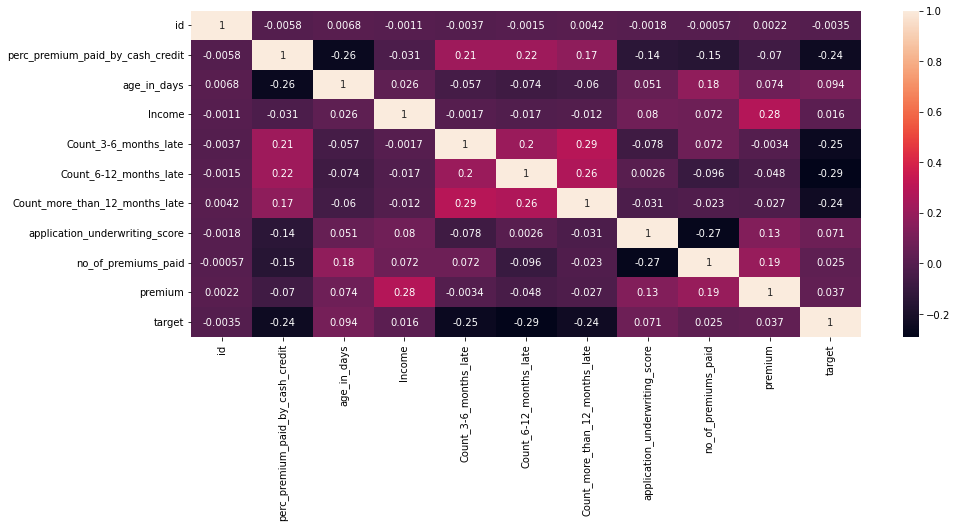

In [5]:
plt.figure(figsize = (15, 6))
sns.heatmap(train_data.corr(), annot = True)

In [6]:
train_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 75
Count_6-12_months_late                75
Count_more_than_12_months_late        75
application_underwriting_score      2243
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

In [7]:
test_data.isnull().sum()

id                                    0
perc_premium_paid_by_cash_credit      0
age_in_days                           0
Income                                0
Count_3-6_months_late                22
Count_6-12_months_late               22
Count_more_than_12_months_late       22
application_underwriting_score      731
no_of_premiums_paid                   0
sourcing_channel                      0
residence_area_type                   0
premium                               0
target                                0
dtype: int64

In [8]:
for dataset in combine: 
    dataset['age'] = dataset['age_in_days']/365
    dataset.drop(['age_in_days'], axis = 1, inplace = True)
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33.035616
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59.030137
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48.030137
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42.030137
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86.027397


In [9]:
train_data[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,target
0,A,0.944542
1,B,0.935591
2,C,0.925514
3,D,0.913860
4,E,0.927505


In [10]:
train_data['IncomeBands'] = pd.cut(train_data['Income'], 5)
train_data[['IncomeBands', 'target']].groupby('IncomeBands', as_index = False).count()

,IncomeBands,target
0,"(-66208.57, 18071744.0]",59992
1,"(18071744.0, 36119458.0]",4
2,"(36119458.0, 54167172.0]",2
3,"(54167172.0, 72214886.0]",0
4,"(72214886.0, 90262600.0]",1


In [11]:
scaler = MinMaxScaler()
scaler = scaler.fit(train_data[['Income']])
x_scaled = scaler.transform(train_data[['Income']])
print(x_scaled)

[[0.00366839]
 [0.00322611]
 [0.00066612]
 ...
 [0.0032249 ]
 [0.00182915]
 [0.00538572]]


In [12]:
train_data['scaled_income'] = x_scaled
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,IncomeBands,scaled_income
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33.035616,"(-66208.57, 18071744.0]",0.003668
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59.030137,"(-66208.57, 18071744.0]",0.003226
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48.030137,"(-66208.57, 18071744.0]",0.000666
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42.030137,"(-66208.57, 18071744.0]",0.002510
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86.027397,"(-66208.57, 18071744.0]",0.001935


In [13]:
train_data['IncomeBands'] = pd.cut(train_data['scaled_income'], 5)
train_data[['IncomeBands', 'target']].groupby('IncomeBands', as_index = False).count()

,IncomeBands,target
0,"(-0.001, 0.2]",59992
1,"(0.2, 0.4]",4
2,"(0.4, 0.6]",2
3,"(0.6, 0.8]",0
4,"(0.8, 1.0]",1


210249.27598793313
166970.0


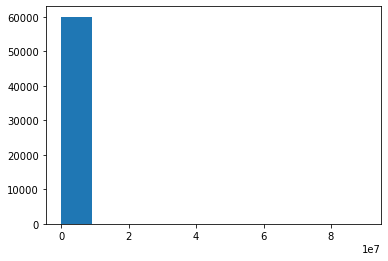

In [14]:
print(train_data['Income'].mean())
print(train_data['Income'].median())

plt.hist(train_data['Income'])
plt.show()

In [15]:
upper_bound = 0.95
lower_bound = 0.1
res = train_data['Income'].quantile([lower_bound, upper_bound])
print(res)
true_index = (train_data['Income'] < res.loc[upper_bound])
false_index = ~true_index
no_outlier_data = train_data[true_index].copy()

0.10     70746.0
0.95    450051.0
Name: Income, dtype: float64


In [16]:
no_outlier_data['IncomeBands'] = pd.cut(no_outlier_data['Income'], 5)
no_outlier_data[['IncomeBands', 'target']].groupby('IncomeBands', as_index = False).count()

,IncomeBands,target
0,"(23603.98, 109234.0]",15351
1,"(109234.0, 194438.0]",20255
2,"(194438.0, 279642.0]",12441
3,"(279642.0, 364846.0]",6473
4,"(364846.0, 450050.0]",2479


In [17]:
combine = [train_data, test_data]
for dataset in combine: 
    dataset.loc[ dataset['Income'] <= 23603.99, 'Income'] = 0
    dataset.loc[(dataset['Income'] > 23603.99) & (dataset['Income'] <= 109232.0), 'Income'] = 1
    dataset.loc[(dataset['Income'] > 109232.0) & (dataset['Income'] <= 194434.0), 'Income'] = 2
    dataset.loc[(dataset['Income'] > 194434.0) & (dataset['Income'] <= 279636.0), 'Income'] = 3
    dataset.loc[(dataset['Income'] > 279636.0) & (dataset['Income'] <= 364838.0), 'Income'] = 4
    dataset.loc[(dataset['Income'] > 364838.0) & (dataset['Income'] <= 450040.0), 'Income'] = 5
    dataset.loc[ dataset['Income'] > 450040.0, 'Income'] = 6
    
train_data.head()
train_data.loc[false_index, 'Income'] = 5
train_data.head()
train_data.drop(['IncomeBands'], axis = 1, inplace = True)
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,scaled_income
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33.035616,0.003668
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59.030137,0.003226
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48.030137,0.000666
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42.030137,0.002510
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86.027397,0.001935


**Grouping by Age**

In [18]:
train_data['AgeBands'] = pd.cut(train_data['age'], 5)
train_data[['AgeBands', 'target']].groupby('AgeBands', as_index = False).count()

,AgeBands,target
0,"(20.932, 37.415]",10772
1,"(37.415, 53.816]",22986
2,"(53.816, 70.217]",20100
3,"(70.217, 86.618]",5662
4,"(86.618, 103.019]",479


In [19]:
for dataset in combine:    
    dataset.loc[ dataset['age'] <= 37.4, 'age'] = 0
    dataset.loc[(dataset['age'] > 37.4) & (dataset['age'] <= 53.8), 'age'] = 1
    dataset.loc[(dataset['age'] > 53.8) & (dataset['age'] <= 70.2), 'age'] = 2
    dataset.loc[(dataset['age'] > 70.2) & (dataset['age'] <= 86.6), 'age'] = 3
    dataset.loc[ dataset['age'] > 86.6, 'age'] = 4
    
train_data.drop('AgeBands', axis = 1, inplace = True)
combine = [train_data, test_data]
train_data.head()

train_data[['age', 'application_underwriting_score']].groupby('age').mean()

,application_underwriting_score
age,
0.0,99.141635
1.0,98.982044
2.0,99.056472
3.0,99.298600
4.0,99.539489


In [20]:
print(train_data[train_data['sourcing_channel'] == 'A']['application_underwriting_score'].std())
train_data[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

0.774656282567539


,sourcing_channel,target
0,A,0.944542
1,B,0.935591
2,C,0.925514
3,D,0.913860
4,E,0.927505


In [21]:
# print(train_data[train_data['sourcing_channel'] == 'C']['application_underwriting_score'].std())
train_data[['sourcing_channel', 'application_underwriting_score']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,application_underwriting_score
0,A,99.101246
1,B,99.058861
2,C,98.979264
3,D,99.040241
4,E,99.074719


In [22]:
train_data[['residence_area_type', 'application_underwriting_score']].groupby('residence_area_type', as_index = False).mean()

,residence_area_type,application_underwriting_score
0,Rural,99.064470
1,Urban,99.069287


We can set the values of underwriting score on the basis of the sourcing channel

In [23]:
train_data.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
target                                int64
age                                 float64
scaled_income                       float64
dtype: object

In [24]:
combine = [train_data, test_data]
for dataset in combine: 
    mask1 = dataset['application_underwriting_score'].isnull()
    for source in ['A', 'B', 'C', 'D', 'E']:
        mask2 = (dataset['sourcing_channel'] == source)
        source_mean = dataset[dataset['sourcing_channel'] == source]['application_underwriting_score'].mean()
        dataset.loc[mask1 & mask2, 'application_underwriting_score'] = source_mean
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,scaled_income
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0.0,0.003668
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2.0,0.003226
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1.0,0.000666
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1.0,0.002510
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3.0,0.001935


In [25]:
dataset['application_underwriting_score'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
19848    False
19849    False
19850    False
19851    False
19852    False
Name: application_underwriting_score, Length: 19853, dtype: bool

In [26]:
test_data[test_data['Count_3-6_months_late'].isnull()]

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
327,92167,1.0,1,NaN,NaN,NaN,99.105992,2,A,Urban,3300,1,0.0
1180,52553,1.0,1,NaN,NaN,NaN,99.840000,2,A,Rural,3300,0,0.0
2762,31126,1.0,1,NaN,NaN,NaN,99.046712,2,B,Urban,5400,0,1.0
3453,80765,1.0,2,NaN,NaN,NaN,99.880000,2,A,Urban,7500,0,0.0
3677,96319,1.0,1,NaN,NaN,NaN,99.860000,2,D,Urban,3300,0,0.0
4465,80463,1.0,1,NaN,NaN,NaN,99.105992,2,A,Urban,3300,1,0.0
4751,57018,1.0,1,NaN,NaN,NaN,99.860000,2,B,Rural,3300,1,0.0
4950,15406,1.0,1,NaN,NaN,NaN,99.880000,2,A,Rural,1200,0,0.0
5403,83531,1.0,1,NaN,NaN,NaN,99.105992,2,A,Rural,9600,0,0.0
5619,109313,1.0,1,NaN,NaN,NaN,98.980276,2,C,Urban,5700,0,1.0


 Add  a new variable 'late premium' for late premiums

<AxesSubplot:xlabel='Count_3-6_months_late', ylabel='count'>

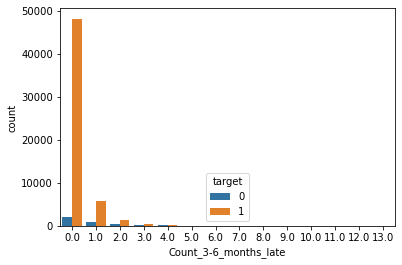

In [27]:
sns.countplot(x = 'Count_3-6_months_late', data = train_data, hue = 'target')

<AxesSubplot:xlabel='Count_6-12_months_late', ylabel='count'>

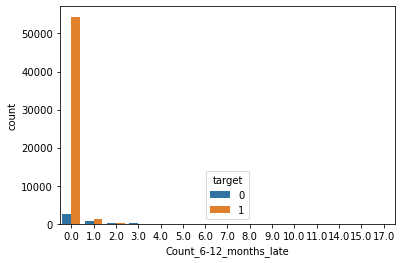

In [28]:
sns.countplot(x = 'Count_6-12_months_late', data = train_data, hue = 'target')

In [29]:
combine = [train_data, test_data]
for dataset in combine: 
    dataset['late_premium'] = 0.0
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,scaled_income,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0.0,0.003668,0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2.0,0.003226,0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1.0,0.000666,0.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1.0,0.002510,0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3.0,0.001935,0.0


In [30]:
combine = [train_data, test_data]
for dataset in combine:
        dataset.loc[(dataset['Count_3-6_months_late'].isnull()),  'late_premium'] = np.NaN
        dataset.loc[(dataset['Count_3-6_months_late'].notnull()), 'late_premium'] = dataset['Count_3-6_months_late'] + dataset['Count_6-12_months_late'] + dataset['Count_more_than_12_months_late']
train_data.head() 

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,scaled_income,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0.0,0.003668,0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2.0,0.003226,0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1.0,0.000666,6.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1.0,0.002510,0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3.0,0.001935,0.0


In [31]:
train_data['target'].corr(train_data['late_premium'])

-0.3602761569327111

<AxesSubplot:>

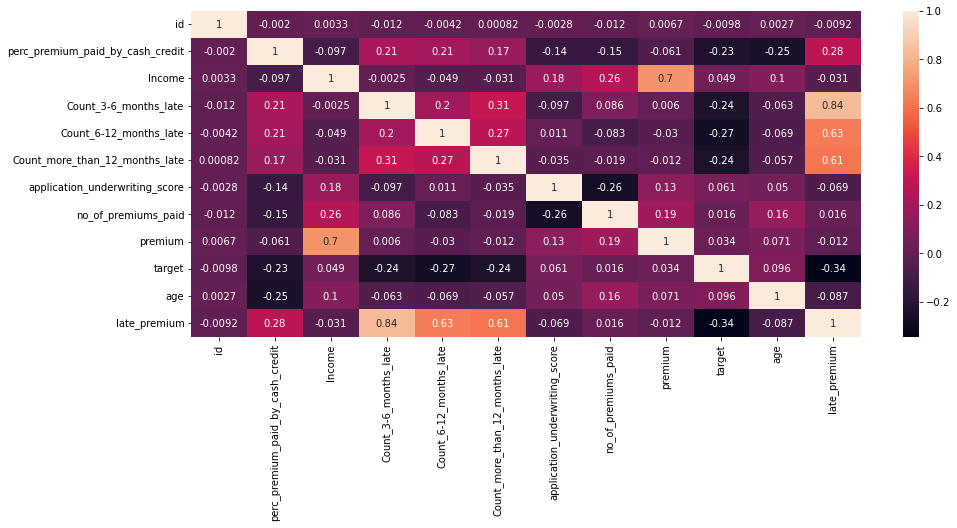

In [32]:
plt.figure(figsize = (15, 6))
sns.heatmap(test_data.corr(), annot = True)

<AxesSubplot:xlabel='late_premium', ylabel='count'>

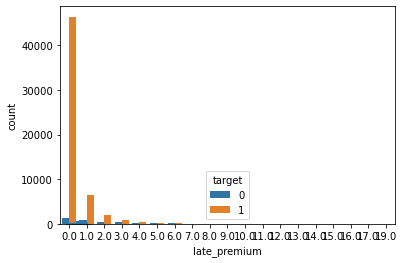

In [33]:
sns.regplot(x = 'perc_premium_paid_by_cash_credit', y = 'late_premium', data = train_data)
sns.countplot(x = 'late_premium', data = train_data, hue = 'target')

If it's more than 7 then the loan is never sanctioned. So, let's set those values first. 

In [34]:
train_data[['late_premium', 'target']].groupby('late_premium').mean()

,target
late_premium,
0.0,0.971760
1.0,0.886994
2.0,0.784119
3.0,0.685663
4.0,0.599668
5.0,0.504110
6.0,0.420814
7.0,0.488000
8.0,0.457143


In [35]:
# for dataset in [train_data]:
train_data.loc[(train_data['target'] == 0) & (train_data['late_premium'].isnull()),'late_premium'] = 7
train_data.loc[(train_data['target'] == 1) & (train_data['late_premium'].isnull()),'late_premium'] = 2
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,scaled_income,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0.0,0.003668,0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2.0,0.003226,0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1.0,0.000666,6.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1.0,0.002510,0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3.0,0.001935,0.0


In [36]:
print(train_data.isnull().sum())
print('\n')
print(test_data.isnull().sum())

id                                   0
perc_premium_paid_by_cash_credit     0
Income                               0
Count_3-6_months_late               75
Count_6-12_months_late              75
Count_more_than_12_months_late      75
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
premium                              0
target                               0
age                                  0
scaled_income                        0
late_premium                         0
dtype: int64


id                                   0
perc_premium_paid_by_cash_credit     0
Income                               0
Count_3-6_months_late               22
Count_6-12_months_late              22
Count_more_than_12_months_late      22
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
premium   

### Replacing the late_premium value in the test data 

In [37]:
guess_prem = np.zeros(5)
for dataset in [test_data]:
    for i in range(1, 6):
        guess_df = dataset[(dataset['Income'] == i)]['late_premium'].dropna()

        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        premium_guess = guess_df.median()
        guess_prem[i - 1] = int(premium_guess) 

    for j in range(1, 6):
        dataset.loc[(dataset.late_premium.isnull()) & (dataset.Income == j), 'late_premium'] = guess_prem[j - 1] + 1

    dataset['late_premium'] = dataset['late_premium'].astype(int)

test_data.head(10)

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,late_premium
0,60574,0.221,1,0.0,0.0,0.0,98.310000,11,A,Rural,1200,1,1.0,0
1,46730,0.011,3,0.0,0.0,0.0,98.830000,11,B,Rural,13800,1,2.0,0
2,30707,0.000,1,0.0,0.0,0.0,99.000000,8,A,Rural,3300,1,2.0,0
3,17886,0.274,2,1.0,0.0,0.0,99.105992,27,A,Rural,1200,1,3.0,1
4,66920,0.211,4,0.0,0.0,0.0,99.530000,6,A,Urban,13800,1,2.0,0
5,108994,0.450,3,0.0,0.0,0.0,99.880000,8,B,Rural,11700,1,2.0,0
6,3129,0.032,1,0.0,0.0,0.0,99.860000,9,C,Rural,1200,1,1.0,0
7,33636,0.666,5,1.0,0.0,0.0,99.110000,16,C,Rural,20100,1,3.0,1
8,88616,0.959,1,0.0,0.0,0.0,99.410000,7,A,Rural,3300,1,0.0,0
9,82463,0.024,3,0.0,0.0,0.0,99.330000,23,A,Urban,18000,1,1.0,0


In [38]:
#train_data.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)
#test_data.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)

## Conversion to numerical data

In [39]:
# Converting Area Type and sourcing channel to Ordinal Variables
combine = [train_data, test_data]
for dataset in combine: 
    dataset['residence_area_type'] = dataset['residence_area_type'].map( {'Urban' : 1, 'Rural' : 0} )
    dataset['sourcing_channel'] = dataset['sourcing_channel'].map( {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4} )
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,scaled_income,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,2,1,3300,1,0.0,0.003668,0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,0,1,18000,1,2.0,0.003226,0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,2,0,3300,0,1.0,0.000666,6.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,0,1,9600,1,1.0,0.002510,0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,1,1,9600,1,3.0,0.001935,0.0


Further conversions

In [40]:
train_data['application_underwriting_score'] = train_data['application_underwriting_score']/100
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,scaled_income,late_premium
0,110936,0.429,4,0.0,0.0,0.0,0.9902,13,2,1,3300,1,0.0,0.003668,0.0
1,41492,0.010,4,0.0,0.0,0.0,0.9989,21,0,1,18000,1,2.0,0.003226,0.0
2,31300,0.917,1,2.0,3.0,1.0,0.9869,7,2,0,3300,0,1.0,0.000666,6.0
3,19415,0.049,3,0.0,0.0,0.0,0.9957,9,0,1,9600,1,1.0,0.002510,0.0
4,99379,0.052,3,0.0,0.0,0.0,0.9987,12,1,1,9600,1,3.0,0.001935,0.0


### Let's also work on no of premiums paid

In [41]:
upper_bound = 0.95
res = train_data['no_of_premiums_paid'].quantile([upper_bound])
print(res)


0.95    20.0
Name: no_of_premiums_paid, dtype: float64


In [42]:
true_index = train_data['no_of_premiums_paid'] < res.loc[upper_bound]
false_index = ~true_index
true_index

0         True
1        False
2         True
3         True
4         True
         ...  
59994     True
59995     True
59996     True
59997     True
59998     True
Name: no_of_premiums_paid, Length: 59999, dtype: bool

In [43]:
train_data['PremBand'] = pd.cut(train_data[true_index]['no_of_premiums_paid'], 4)
train_data[['PremBand', 'application_underwriting_score']].groupby('PremBand').count()

,application_underwriting_score
PremBand,
"(1.983, 6.25]",11516
"(6.25, 10.5]",20882
"(10.5, 14.75]",15415
"(14.75, 19.0]",8410


In [44]:
# combine = [train_data, test_data]
# for dataset in combine: 
#     dataset.loc[ dataset['no_of_premiums_paid'] <= 6.25, 'no_of_premiums_paid'] = 0
#     dataset.loc[(dataset['no_of_premiums_paid'] > 6.25) & (dataset['no_of_premiums_paid'] <= 10.5), 'no_of_premiums_paid'] = 1
#     dataset.loc[(dataset['no_of_premiums_paid'] > 10.50) & (dataset['no_of_premiums_paid'] <= 14.75), 'no_of_premiums_paid'] = 2
#     dataset.loc[(dataset['no_of_premiums_paid'] > 14.75) & (dataset['no_of_premiums_paid'] <= 19.0), 'no_of_premiums_paid'] = 3
#     dataset.loc[ dataset['no_of_premiums_paid'] > 19.0, 'no_of_premiums_paid'] = 4
    
# train_data.drop('PremBand', axis = 1, inplace = True)
# train_data.head()

### We also need to convert the premium column

In [45]:
upper_bound = 0.90
res = train_data['premium'].quantile([upper_bound])
print(res)
true_index = train_data['premium'] < res.loc[upper_bound]
false_index = ~true_index
true_index

0.9    22200.0
Name: premium, dtype: float64


0         True
1         True
2         True
3         True
4         True
         ...  
59994     True
59995     True
59996    False
59997     True
59998    False
Name: premium, Length: 59999, dtype: bool

In [46]:
train_data['PremBand'] = pd.cut(train_data[true_index]['premium'], 4)
train_data[['PremBand', 'target']].groupby('PremBand').count()

,target
PremBand,
"(1181.1, 5925.0]",23092
"(5925.0, 10650.0]",14044
"(10650.0, 15375.0]",9997
"(15375.0, 20100.0]",6235


In [47]:
test_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,late_premium
0,60574,0.221,1,0.0,0.0,0.0,98.310000,11,0,0,1200,1,1.0,0
1,46730,0.011,3,0.0,0.0,0.0,98.830000,11,1,0,13800,1,2.0,0
2,30707,0.000,1,0.0,0.0,0.0,99.000000,8,0,0,3300,1,2.0,0
3,17886,0.274,2,1.0,0.0,0.0,99.105992,27,0,0,1200,1,3.0,1
4,66920,0.211,4,0.0,0.0,0.0,99.530000,6,0,1,13800,1,2.0,0


In [48]:
combine = [train_data]
for dataset in combine: 
    dataset.loc[ dataset['premium'] <= 5925.0, 'premium'] = 0
    dataset.loc[(dataset['premium'] > 5925.00) & (dataset['premium'] <= 10650.0), 'premium'] = 1
    dataset.loc[(dataset['premium'] > 10650.0) & (dataset['premium'] <= 15375.0), 'premium'] = 2
    dataset.loc[(dataset['premium'] > 15375.0) & (dataset['premium'] <= 201200.0), 'premium'] = 3
    dataset.loc[ dataset['premium'] > 201200.0, 'premium'] = 4
#train_data.drop('PremBand', axis = 1, inplace = True)
train_data.head()
combine = [train_data, test_data]

Finally convert percentage premium paid

In [49]:
train_data['PremBand'] = pd.cut(train_data['perc_premium_paid_by_cash_credit'], 4)
train_data[['PremBand', 'target']].groupby('PremBand').mean()

,target
PremBand,
"(-0.001, 0.25]",0.975984
"(0.25, 0.5]",0.947232
"(0.5, 0.75]",0.901014
"(0.75, 1.0]",0.814579


In [50]:
combine = [train_data, test_data]
for dataset in combine: 
    dataset.loc[ dataset['perc_premium_paid_by_cash_credit'] <= 0.25, 'perc_premium_paid_by_cash_credit'] = 0
    dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 0.25) & (dataset['perc_premium_paid_by_cash_credit'] <= 0.5), 'perc_premium_paid_by_cash_credit'] = 1
    dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 0.5) & (dataset['perc_premium_paid_by_cash_credit'] <= 0.75), 'perc_premium_paid_by_cash_credit'] = 2
    dataset.loc[ dataset['perc_premium_paid_by_cash_credit'] > 0.75, 'perc_premium_paid_by_cash_credit'] = 3
train_data.drop('PremBand', axis = 1, inplace = True)
train_data[['perc_premium_paid_by_cash_credit', 'late_premium']] = train_data[['perc_premium_paid_by_cash_credit', 'late_premium']].astype(int)
test_data[['perc_premium_paid_by_cash_credit']] = test_data[['perc_premium_paid_by_cash_credit']].astype(int)
test_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,late_premium
0,60574,0,1,0.0,0.0,0.0,98.310000,11,0,0,1200,1,1.0,0
1,46730,0,3,0.0,0.0,0.0,98.830000,11,1,0,13800,1,2.0,0
2,30707,0,1,0.0,0.0,0.0,99.000000,8,0,0,3300,1,2.0,0
3,17886,3,2,1.0,0.0,0.0,99.105992,27,0,0,1200,1,3.0,1
4,66920,0,4,0.0,0.0,0.0,99.530000,6,0,1,13800,1,2.0,0


**Model Training and Testing**

In [51]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
combine = [train_data, test_data]

In [52]:
X_train = train_data.iloc[:, :-1]
print("this is xtrain",X_train)
print(X_train.columns)
X_test = test_data
X_test = X_test.drop('target',axis=1)
print(X_test.columns)
y_train = train_data.iloc[:, -1]
y_test = test_data.iloc[:, -1]
y_test
X_test.shape

this is xtrain            id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0      110936                             0.429        12058  355060   
1       41492                             0.010        21546  315150   
2       31300                             0.917        17531   84140   
3       19415                             0.049        15341  250510   
4       99379                             0.052        31400  198680   
...       ...                               ...          ...     ...   
59994   28833                             0.318        21913  227850   
59995   82788                             0.252        16074  144150   
59996    9183                             0.014        25199  315040   
59997   74596                             0.000        14608  189090   
59998   46518                             0.508        15707  510030   

       Count_3-6_months_late  Count_6-12_months_late  \
0                        0.0                     0.0   
1       

(19853, 12)

In [53]:
X_train = X_train.drop(['id','perc_premium_paid_by_cash_credit','sourcing_channel','residence_area_type'], axis = 1)
# X_train = X_train.reset_index()
X_train.fillna(method='ffill', inplace=True)
              
X_test.fillna(method='ffill', inplace=True)

X_test = X_test.drop(['id','perc_premium_paid_by_cash_credit','sourcing_channel','residence_area_type'], axis = 1)
# X_test = X_test.reset_index()
print(X_train.shape, y_train.shape, X_test.shape)
scaler = StandardScaler()
a = scaler.fit_transform(X_train)
b = scaler.fit_transform(X_test)
a

(59999, 8) (59999,) (19853, 8)


array([[-1.30337848,  0.25992193, -0.36059519, ..., -0.06201612,
         0.413022  , -0.81118146],
       [ 0.51897607,  0.18828715, -0.36059519, ...,  1.10687157,
         1.95591024,  0.75033188],
       [-0.2521826 , -0.22635455,  2.51396145, ..., -0.50538732,
        -0.74414419, -0.81118146],
       ...,
       [ 1.22060562,  0.18808971, -0.36059519, ...,  0.58288743,
        -0.1655611 ,  1.86569856],
       [-0.81360149, -0.03797895, -0.36059519, ..., -0.03514514,
        -0.74414419, -1.0342548 ],
       [-0.60251721,  0.53807882,  2.51396145, ..., -0.20980652,
         0.99160509,  4.09643192]])

In [54]:
##Logistic Regression

In [55]:
logreg = LogisticRegression()
logreg.fit(a, y_train)
#args = np.array(arg)
y_pred = logreg.predict(b)
print(y_pred)
ab1 = accuracy_score(y_test,y_pred)
ab1 = round(ab1 * 100,2)
ab1

[1 1 1 ... 1 1 1]


94.0

In [56]:
from sklearn.metrics import classification_report

classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.52      0.12      0.19      1204\n           1       0.95      0.99      0.97     18649\n\n    accuracy                           0.94     19853\n   macro avg       0.73      0.56      0.58     19853\nweighted avg       0.92      0.94      0.92     19853\n'

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[  144,  1060],
       [  131, 18518]], dtype=int64)

In [58]:
##Gaussian Naive Bayes

In [59]:
logreg = GaussianNB()
logreg.fit(a, y_train)
#args = np.array(arg)
y_pred = logreg.predict(b)
print(y_pred)
#acc_log = round(logreg.score(y_test,y_pred) * 100, 2)
#acc_log

ab2 = accuracy_score(y_test,y_pred)
ab2 = round(ab2 * 100,2)
ab2

[1 1 1 ... 1 1 0]


91.04

In [60]:
##K-Nearest Neighbor

In [61]:
logreg = KNeighborsClassifier()
logreg.fit(a, y_train)
#args = np.array(arg)
y_pred = logreg.predict(b)
print(y_pred)
#acc_log = round(logreg.score(y_test,y_pred) * 100, 2)
#acc_log

ab3 = accuracy_score(y_test,y_pred)
ab3 = round(ab3 * 100,2)
ab3

[1 1 1 ... 1 1 1]


93.59

In [62]:
#Perceptron

In [63]:
logreg = Perceptron()
logreg.fit(a, y_train)
#args = np.array(arg)
y_pred = logreg.predict(b)
print(y_pred)
#acc_log = round(logreg.score(y_test,y_pred) * 100, 2)
#acc_log

ab4 = accuracy_score(y_test,y_pred)
ab4 = round(ab4 * 100,2)
ab4

[1 1 1 ... 1 1 1]


92.37

In [64]:
#Stochastic Gradient Classifier

In [65]:
logreg = SGDClassifier()
logreg.fit(a, y_train)
#args = np.array(arg)
y_pred = logreg.predict(b)
print(y_pred)
#acc_log = round(logreg.score(y_test,y_pred) * 100, 2)
#acc_log

ab5 = accuracy_score(y_test,y_pred)
ab5 = round(ab5 * 100,2)
ab5

[1 1 1 ... 1 1 1]


93.94

In [66]:
#Decision Tree Classifier

In [67]:
logreg = DecisionTreeClassifier()
logreg.fit(a, y_train)
#args = np.array(arg)
y_pred = logreg.predict(b)
print(y_pred)
#acc_log = round(logreg.score(y_test,y_pred) * 100, 2)
#acc_log

ab6 = accuracy_score(y_test,y_pred)
ab6 = round(ab6 * 100,2)
ab6

[1 1 1 ... 1 1 0]


83.32

In [68]:
#Random Forest Classifier

In [69]:
logreg = RandomForestClassifier(n_estimators = 10)
logreg.fit(a, y_train)
#args = np.array(arg)
y_pred = logreg.predict(b)
print(y_pred)
#acc_log = round(logreg.score(y_test,y_pred) * 100, 2)
#acc_log

ab7 = accuracy_score(y_test,y_pred)
ab7 = round(ab7 * 100,2)
ab7

[1 1 1 ... 1 1 1]


92.84

In [70]:
#Showing Accuracy in a Table Format

In [71]:
pred_values = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [ab3, ab1, 
              ab7, ab2, ab4, 
              ab5, ab6]})
pred_values.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,94.00
5,Stochastic Gradient Decent,93.94
0,KNN,93.59
2,Random Forest,92.84
4,Perceptron,92.37
3,Naive Bayes,91.04
6,Decision Tree,83.32


In [72]:
submission = pd.DataFrame({
        "id": test_data["id"],
        "target": y_pred
    })
submission.to_csv('submission.csv', index=False)

In [73]:
submission.describe()

,id,target
count,19853.000000,19853.000000
mean,56928.513424,0.965194
std,33005.615785,0.183292
min,2.000000,0.000000
25%,28480.000000,1.000000
50%,56897.000000,1.000000
75%,85362.000000,1.000000
max,114076.000000,1.000000


In [74]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
ann = tf.keras.models.Sequential()

In [75]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [76]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [77]:
ann.fit(X_train,y_train,batch_size=32,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2483 - accuracy: 0.9180
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1914 - accuracy: 0.9387
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1900 - accuracy: 0.9390
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1894 - accuracy: 0.9389
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1890 - accuracy: 0.9390
